In [12]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
creditcard_df = pd.read_csv('creditcard.csv')

In [14]:
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
creditcard_df.shape

(284807, 31)

In [16]:
creditcard_df.ndim


2

In [17]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
creditcard_df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: xlabel='Class'>

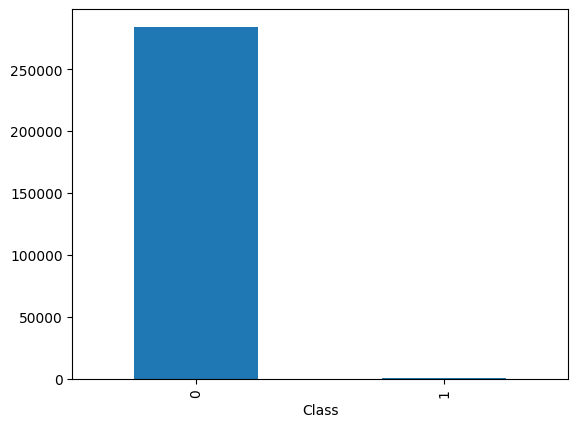

In [20]:
creditcard_df['Class'].value_counts().plot(kind='bar')


In [21]:
creditcard_df.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
fraud = creditcard_df[creditcard_df.Class==1]
normal = creditcard_df[creditcard_df.Class==0]

In [23]:
creditcard_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [26]:
normal.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [27]:
normal_sample = normal.sample(n=492)

In [28]:
new_data = pd.concat([normal_sample, fraud],axis=0)

In [29]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65246,51496.0,0.364591,1.383367,-0.225853,1.476089,-0.025385,-0.584621,-0.731673,-2.852329,-0.691496,...,-1.314845,0.324185,-0.041819,0.252363,0.828075,-0.234587,0.062356,0.185844,1.00,0
249467,154425.0,-0.560017,0.118265,0.857692,-2.204233,0.473159,-0.619172,0.585311,-0.136568,-0.854952,...,-0.442658,-1.337221,-0.001165,0.408887,0.505578,-0.664630,-0.021214,-0.190912,49.99,0
172888,121284.0,1.611049,-1.906742,-1.368653,-0.752484,-0.851322,-0.236518,-0.352589,-0.277983,-0.087965,...,0.358083,0.409589,-0.248701,-0.937798,-0.122634,-0.153286,-0.056079,-0.000963,341.00,0
222999,143213.0,1.990670,0.539420,-2.312888,0.673966,0.585180,-1.448916,0.267310,-0.249703,0.226148,...,0.161727,0.644851,-0.044027,-0.193802,0.204917,-0.120528,0.020234,-0.001828,1.00,0
126135,77943.0,-1.895630,2.261402,0.097307,-0.708852,0.367071,-0.103140,0.562780,0.189176,0.685210,...,-0.497839,-0.902894,-0.091001,-0.915946,0.347413,0.157523,0.962466,0.553191,7.16,0


In [30]:
new_data.Class.value_counts()

,count
Class,
0,492
1,492


In [31]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95371.380081,-0.024123,-0.042375,-0.111835,0.000837,0.107530,0.008455,0.013978,-0.016166,0.062098,...,-0.022900,0.016547,-0.019360,-0.064148,-0.026107,0.009404,-0.006651,0.016667,0.012672,89.195671
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [32]:
x=new_data.drop(columns='Class',axis=1)
y=new_data['Class']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=11)

In [41]:
model= LogisticRegression(max_iter=200, random_state=20)

In [42]:
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=20)

In [43]:
train_prediction = model.predict(x_train)
training_accuracy = accuracy_score(train_prediction, y_train)

In [44]:
training_accuracy

0.9364675984752223

In [45]:
test_prediction = model.predict(x_test)
testing_accuracy = accuracy_score(test_prediction, y_test)

In [46]:
testing_accuracy

0.9543147208121827

In [48]:
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       104
           1       0.98      0.92      0.95        93

    accuracy                           0.95       197
   macro avg       0.96      0.95      0.95       197
weighted avg       0.96      0.95      0.95       197



In [50]:
confusion_matrix(y_test, test_prediction)

array([[102,   2],
       [  7,  86]])

<Axes: >

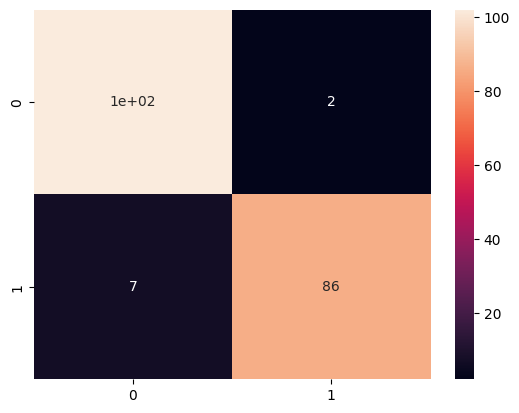

In [52]:
sns.heatmap(confusion_matrix(y_test, test_prediction),annot=True)

